# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre subamostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos ainda não vistos (conjunto de teste) e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução nos conjuntos de treinamento e teste? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Crie a funcao alvo e o dataset


# Gerar dois pontos 
p1 = np.random.uniform(-1, 1, 2)
p2 = np.random.uniform(-1, 1, 2)

# 2. Calcular o coeficiente angular (m) e o coeficiente linear (b)
# y = m*x + b
m = (p2[1] - p1[1]) / (p2[0] - p1[0])  # coeficiente angular
b = p1[1] - m * p1[0]                  # coeficiente linear

# Armazenar os coeficientes
coef_angular = m
bias = b

# funçao
f = [m, b]

# 3. Gerar 1000 pontos aleatórios 
X = np.random.uniform(-1, 1, (1000, 2))  


def funcao_alvo(x):
    return coef_angular * x + bias


def classifica(X):
    return np.sign(X[:, 1] - funcao_alvo(X[:, 0]))
# Classificação com np.sign

y = classifica(X)


print(f"{X[:5]}")

[[-0.47451837 -0.91995336]
 [ 0.70191081 -0.83618006]
 [-0.3453027  -0.73559508]
 [ 0.63076341  0.81279626]
 [ 0.28420638  0.65097587]]


### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

In [20]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.
    
    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """
    
    line = np.linspace(-1, 1, 1000) 
    plt.plot(line, m*line + b, label="f(x)", c="green")

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:        
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()      


    

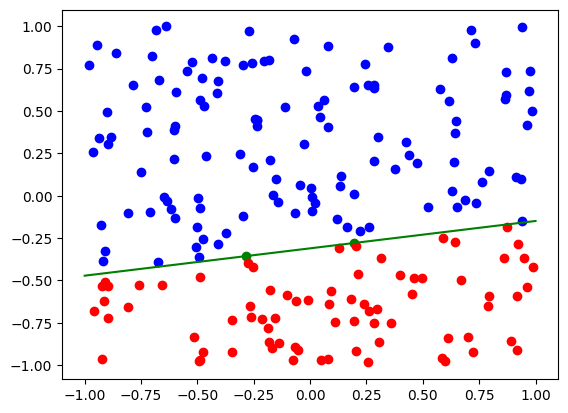

In [21]:
show_dataset(X, y, p1, p2, m, b)


### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

In [ ]:
def PLA(X, y, f):
    """
    Algoritmo de Aprendizagem do Perceptron.

    Parâmetros:
    - X (list[]): Matriz de dados da amostra. Cada elemento é uma lista com coordenadas [x1, x2].
    - y (list): Classificação dos pontos (+1 ou -1).
    - f (list): Lista [m, b] com coeficiente angular e linear da função alvo.

    Retorno:
    - it (int): Número de iterações até convergir (todas as classificações corretas).
    - w (list): Pesos finais do perceptron [w0, w1, w2].
    """
    
    # Inicialização dos pesos: w0 (bias), w1, w2
    w = np.zeros(3)
    it = 0  # contador de iterações

    while True:
        listaPCI = []  # pontos classificados incorretamente

        for i in range(len(X)):
            x_i = np.array([1, X[i][0], X[i][1]])  # vetor com bias
            y_pred = np.sign(np.dot(w, x_i))

            if y_pred != y[i]:
                listaPCI.append((x_i, y[i]))

        if len(listaPCI) == 0:
            break  # todos os pontos estão corretamente classificados

        # Escolher um ponto incorreto aleatoriamente
        x_escolhido, y_escolhido = random.choice(listaPCI)

        # Atualizar os pesos
        w = w + y_escolhido * x_escolhido
        it += 1

        # Plotar o gráfico após a atualização
        plot_grafico(X, y, w, f)

    return it, w
   

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [11]:
%matplotlib inline
def plot_grafico(X, y, w, f):   
    """
    Esta função objetiva a visualização dos passos do PLA.
    
    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.    
    """
    
    nPontos = len(X)    
    #matplotlib.use('TkAgg')    
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)   


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [12]:
def constroiListaPCI(X, y, w):
    """
    Constrói a lista de pontos classificados incorretamente.

    Retorno:
    - l (list): Lista de pontos classificados incorretamente, no formato expandido [1, x1, x2].
    - new_y (list): Lista com os rótulos verdadeiros dos pontos classificados incorretamente.
    """
    l = []
    new_y = []

    for i in range(len(X)):
        x_i = np.array([1, X[i][0], X[i][1]])  # vetor com bias
        y_pred = np.sign(np.dot(w, x_i))

        if y_pred != y[i]:  # classificação incorreta
            l.append(x_i)
            new_y.append(y[i])

    return l, new_y


### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique a acurácia do modelo com uma subamostra de teste, com pelo menos 100 pontos,
que contém pontos diferentes das subamostras utilizadas para treinamento.

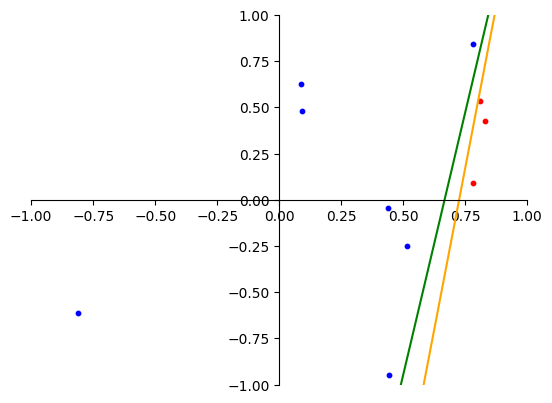

In [13]:

#Geração de dados de treino e teste
def gera_dados(N):
    X = np.random.uniform(-1, 1, (N, 2))
    y = classifica(X)
    return X, y

#Avaliação de acurácia
def calcula_acuracia(X, y, w):
    acertos = 0
    for i in range(len(X)):
        x_i = np.array([1, X[i][0], X[i][1]])
        y_pred = np.sign(np.dot(w, x_i))
        if y_pred == y[i]:
            acertos += 1
    return acertos / len(X)

#Treinamento com N = 10
X10, y10 = gera_dados(10)
it10, w10 = PLA(X10, y10, f)

#Dados de teste com 1000 pontos
X_test, y_test = gera_dados(1000)




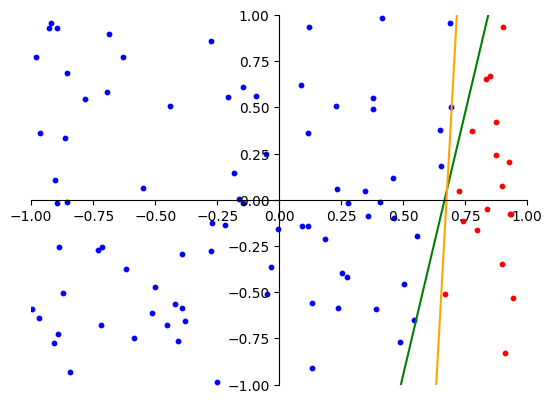

In [14]:
#Treinamento com N = 100
X100, y100 = gera_dados(100)
it100, w100 = PLA(X100, y100, f)

In [15]:
acc10 = calcula_acuracia(X_test, y_test, w10)
acc100 = calcula_acuracia(X_test, y_test, w100)


print(f"[Treinamento com N=10] Iterações: {it10}, Acurácia: {acc10:.2f}")
print(f"[Treinamento com N=100] Iterações: {it100}, Acurácia: {acc100:.2f}")

[Treinamento com N=10] Iterações: 63, Acurácia: 0.98
[Treinamento com N=100] Iterações: 20, Acurácia: 0.98
